<a href="https://colab.research.google.com/github/hongseoi/colab/blob/main/easyOCR01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 잘되는 영수증 이미지 찾기
+ 이미지 데이터를 찾기
+ Threshold 조절
+ 숫자를 인식: 다 str이라 계산하려면 후처리 필요
### 2. 잘 안되는 영수증 이미지를 전처리해서 잘 인식하게 개선
+ Data augmentation
    * 글자 진함이 다른 경우
    * 구겨진 경우
    * 기울어진 경우
    * 화질이 나쁜 경우
+ 영수증의 종류
    * 표준 전자영수증
+ 데이터 추가: ai hub >> custum_model.md 참고
+ output 넘김(?)문제 >> 같은 줄이면 같은 줄로 출력되도록
### 3. 다른 모델로 바꿔서 적용
### 4-1. 그 모델의 논문을 읽고 모델 선정 이유를 조사
### 4-2. 영어로 학습된 모델을 한글로 학습해서 적용

### 참고사이트
* https://velog.io/@bokyungkim/EasyOCR%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%B4-%ED%8B%B0%EC%BC%93-%EC%86%8D-%EB%AC%B8%EC%9E%90%EB%A5%BC-%ED%85%8D%EC%8A%A4%ED%8A%B8%ED%99%94-%ED%95%B4%EB%B3%B4%EC%9E%90

In [1]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 28.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
root = '/content/drive/MyDrive/공모전/text-ocr/receipts/'

In [10]:
import matplotlib.pyplot as plt
import cv2
import easyocr
import numpy as np
import random
from PIL import ImageFont, ImageDraw, Image

In [ ]:
reader = easyocr.Reader(['ko', 'en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

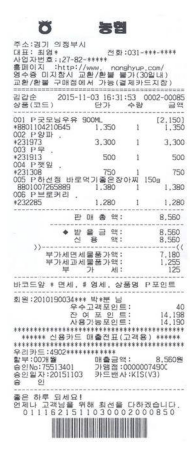

In [ ]:
img = plt.imread(root + 'receipt03.jpg')
plt.figure(figsize=(8, 8))
img[:, :, ::-1]
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
result = reader.readtext(root+'/receipt03.jpg', detail=0) #detail=0: 인식된 텍스트만 출력
result

['5',
 '농협',
 '주소 :김기 의정부시',
 '대표',
 '전화 :031-+++-++++',
 '{품하볼염:hztsgar',
 '-*++*+',
 '데이',
 ';장X: 교랜',
 'nonghyun',
 'com/',
 '입수 3 미지',
 '교망',
 '가 ( 30입내 )',
 '구야정에 서',
 '감감스',
 '2015-]1-03 16:31 :53',
 '00D2-00055',
 '상촌 (코드 )',
 '단가',
 '수량',
 '0O1',
 '조모님우유',
 '9D0n',
 '[2. 150]',
 '*8831104210645',
 '350',
 ',330',
 '002',
 '임파',
 '4231973',
 '3,300',
 '3,300',
 '003',
 "1'다",
 '*231913',
 '500',
 '500',
 '004',
 '꼬임',
 '*231308',
 '750',
 '750',
 '0U5',
 '하선정',
 '바로먹기 온장아씨',
 '1ED3',
 '5801007255839',
 ',3B0',
 '380',
 '006',
 '로커리',
 '*232285',
 '230',
 '280',
 '만 매',
 '580',
 '찬',
 '올 금',
 '560',
 '560',
 '> )-',
 'IBD',
 '부가세품세m물가역=',
 '255',
 '125',
 '바코드앞',
 '면세',
 '임세',
 '상품명',
 'P모입트',
 '회원 :2010190334+*+',
 '박구난',
 '우수고각 모인트',
 '잔 여',
 '인 트',
 '1드3',
 '사용가 능포인트',
 'J5J',
 '+>4 + + ++V',
 '신용카드 매#전표 (고객8 )',
 '4+4++주4++',
 '++4+++++++++++',
 '우리카드',
 '4902+*',
 ':OD개',
 '얘소금액',
 '550원',
 '승인No:75513401',
 '카을천 ;034030V39C',
 ':0000007493C',
 '승인입자 :20151103',
 '은 하루',
 '되

In [ ]:
THRESHOLD = 0.001

for bbox, text, conf in result:
  if conf > THRESHOLD:
    print(text)
    c1, c2 = (int(bbox[0][0]), int(bbox[0][1])), (int(bbox[2][0]), int(bbox[2][1]))
    cv2.rectangle(img, c1, c2, (0,255,0), 1)
plt.figure(figsize=(8, 8))
plt.imshow(img[:, :, ::-1])
plt.axis('off')
plt.show()

NameError: ignored

In [ ]:
def read(img_path, THRESHOLD):
    img = cv2.imread(img_path)

    result = reader.readtext(img_path)

    r = []

    for bbox, text, conf in result:
        if conf > THRESHOLD:
          print(text)
          c1, c2 = (int(bbox[0][0]), int(bbox[0][1])), (int(bbox[2][0]), int(bbox[2][1]))
          cv2.rectangle(img, c1, c2, (0,255,0), 1)
    print(r)
    plt.figure(figsize=(8, 8))
    plt.imshow(img[:, :, ::-1])
    plt.axis('off')
    plt.show()

In [ ]:
ls

receipt01.jpg  receipt03.jpg  receipt06.jpg  reciept04.jpg
receipt02.jpg  receipt05.jpg  receipt07.jpg


In [ ]:
img_path = root+'/receipt01.jpg'

In [ ]:
img_lst = []
for i in range(1, 8):
  img_lst.append(f'{root}receipt0{i}.jpg')

img_lst


['/content/drive/MyDrive/공모전/text-ocr/receipts/receipt01.jpg',
 '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt02.jpg',
 '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt03.jpg',
 '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt04.jpg',
 '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt05.jpg',
 '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt06.jpg',
 '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt07.jpg']

런금( 소독국제 )
접시겨다 )
시비거 :
내스무벼 :
(()()()C)U)XXXX
수퍼 터오
2J'?rU5
퍽 서
# {
gu UE 꽤
4 01 씨
0여
만
게
O0. 000 뭐
여금임 수슴   국서적다의지: '람4 2O
1415p1E &)
Wlu'
[]


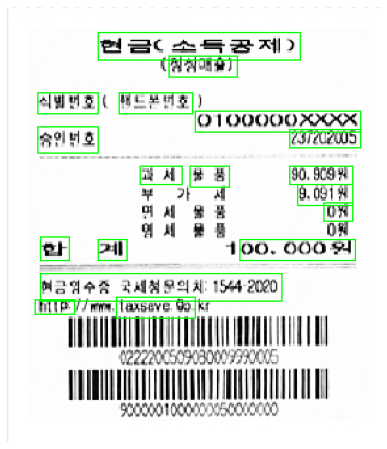

STARBUCKS
현금(지출증방)
영등포구청역점
T:1522-3232
서울 영등포구 국회대로 558
대표
승데이비드호섭
201-81-21515
[매장#3892,POS 01]
2022-09-26 11:26:31
뚜무호
(A-50)
G)홀드브루
5400
5400
합계
 ->    5,400
결제금액
5,400
(부가세포함)
(491)
스타넉스카드
400
스타넉스카드
61997317****554*
승인번호:
304799
카드잔액: 42,300
제유할인 (KT)
4,000
카들
종류
KT
맵버십
번호
29171008****964*
승인번호 (가망점) 3123488336
(AD60133581)
다스타버스
리워드
(CPAJ**
*골드레벌(~2024/05/12
까지
유지)
*구론:0
별:4 (무료음료까지 8개 필요)
현금영수증 발급
22****0017
승인금액
4OO
승인번호
177887156
현금영수증 문의
126-1-1
[]


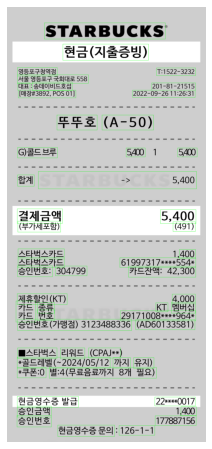

5
농협
주소 :김기 의정부시
대표
전화 :031-+++-++++
-*++*+
데이
nonghyun
com/
입수 3 미지
교망
가 ( 30입내 )
구야정에 서
감감스
2015-]1-03 16:31 :53
00D2-00055
상촌 (코드 )
단가
수량
0O1
조모님우유
9D0n
[2. 150]
*8831104210645
350
,330
002
임파
4231973
3,300
3,300
003
1'다
*231913
500
500
004
꼬임
*231308
750
750
0U5
하선정
바로먹기 온장아씨
1ED3
5801007255839
,3B0
380
006
로커리
*232285
230
280
만 매
580
찬
올 금
560
560
> )-
IBD
부가세품세m물가역=
255
125
바코드앞
면세
임세
상품명
P모입트
회원 :2010190334+*+
박구난
우수고각 모인트
잔 여
인 트
1드3
사용가 능포인트
J5J
+>4 + + ++V
신용카드 매#전표 (고객8 )
4+4++주4++
++4+++++++++++
우리카드
4902+*
:OD개
얘소금액
550원
승인No:75513401
카을천 ;034030V39C
:0000007493C
승인입자 :20151103
은 하루
되체요
언장난 ,
[]


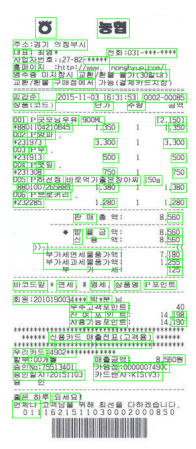

FileNotFoundError: ignored

In [ ]:
for i in img_lst:
  read(i, 0.01)

5
농협
주소 :김기 의정부시
대표
전화 :031-+++-++++
{품하볼염:hztsgar
-*++*+
데이
;장X: 교랜
nonghyun
com/
입수 3 미지
교망
가 ( 30입내 )
구야정에 서
감감스
2015-]1-03 16:31 :53
00D2-00055
상촌 (코드 )
단가
수량
0O1
조모님우유
9D0n
[2. 150]
*8831104210645
350
,330
002
임파
4231973
3,300
3,300
003
1'다
*231913
500
500
004
꼬임
*231308
750
750
0U5
하선정
바로먹기 온장아씨
1ED3
5801007255839
,3B0
380
006
로커리
*232285
230
280
만 매
580
찬
올 금
560
560
> )-
IBD
부가세품세m물가역=
255
125
바코드앞
면세
임세
상품명
P모입트
회원 :2010190334+*+
박구난
우수고각 모인트
잔 여
인 트
1드3
사용가 능포인트
J5J
+>4 + + ++V
신용카드 매#전표 (고객8 )
4+4++주4++
++4+++++++++++
우리카드
4902+*
:OD개
얘소금액
550원
승인No:75513401
카을천 ;034030V39C
:0000007493C
승인입자 :20151103
은 하루
되체요
언장난 ,
'{고경프 {5 위해0 3승하0 달하경숨님당
{슬물(제카드지장 )
[]


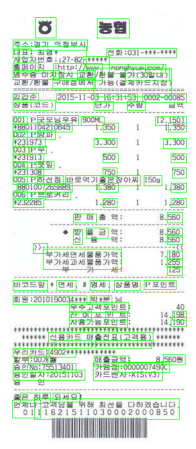

In [ ]:
read( '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt03.jpg',0)

5
농협
주소 :김기 의정부시
대표
전화 :031-+++-++++
{품하볼염:hztsgar
-*++*+
데이
;장X: 교랜
nonghyun
com/
입수 3 미지
교망
가 ( 30입내 )
구야정에 서
감감스
2015-]1-03 16:31 :53
00D2-00055
상촌 (코드 )
단가
수량
0O1
조모님우유
9D0n
[2. 150]
*8831104210645
350
,330
002
임파
4231973
3,300
3,300
003
1'다
*231913
500
500
004
꼬임
*231308
750
750
0U5
하선정
바로먹기 온장아씨
1ED3
5801007255839
,3B0
380
006
로커리
*232285
230
280
만 매
580
찬
올 금
560
560
> )-
IBD
부가세품세m물가역=
255
125
바코드앞
면세
임세
상품명
P모입트
회원 :2010190334+*+
박구난
우수고각 모인트
잔 여
인 트
1드3
사용가 능포인트
J5J
+>4 + + ++V
신용카드 매#전표 (고객8 )
4+4++주4++
++4+++++++++++
우리카드
4902+*
:OD개
얘소금액
550원
승인No:75513401
카을천 ;034030V39C
:0000007493C
승인입자 :20151103
은 하루
되체요
언장난 ,
'{고경프 {5 위해0 3승하0 달하경숨님당
{슬물(제카드지장 )
[]


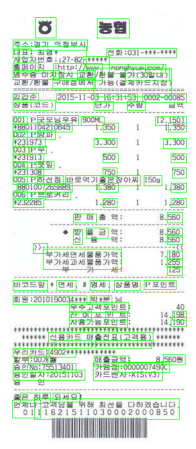

In [ ]:
read( '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt03.jpg',0.001)

5
농협
주소 :김기 의정부시
대표
전화 :031-+++-++++
-*++*+
데이
nonghyun
com/
입수 3 미지
교망
가 ( 30입내 )
구야정에 서
감감스
2015-]1-03 16:31 :53
00D2-00055
상촌 (코드 )
단가
수량
0O1
조모님우유
9D0n
[2. 150]
*8831104210645
350
,330
002
임파
4231973
3,300
3,300
003
1'다
*231913
500
500
004
꼬임
*231308
750
750
0U5
하선정
바로먹기 온장아씨
1ED3
5801007255839
,3B0
380
006
로커리
*232285
230
280
만 매
580
찬
올 금
560
560
> )-
IBD
부가세품세m물가역=
255
125
바코드앞
면세
임세
상품명
P모입트
회원 :2010190334+*+
박구난
우수고각 모인트
잔 여
인 트
1드3
사용가 능포인트
J5J
+>4 + + ++V
신용카드 매#전표 (고객8 )
4+4++주4++
++4+++++++++++
우리카드
4902+*
:OD개
얘소금액
550원
승인No:75513401
카을천 ;034030V39C
:0000007493C
승인입자 :20151103
은 하루
되체요
언장난 ,
[]


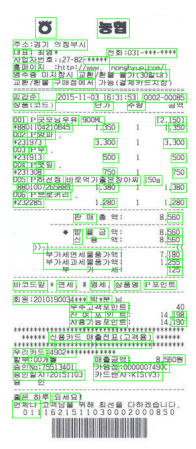

In [ ]:
read( '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt03.jpg',0.01)

5
농협
주소 :김기 의정부시
대표
전화 :031-+++-++++
-*++*+
데이
nonghyun
com/
입수 3 미지
교망
가 ( 30입내 )
구야정에 서
감감스
2015-]1-03 16:31 :53
00D2-00055
상촌 (코드 )
단가
수량
0O1
조모님우유
9D0n
[2. 150]
*8831104210645
350
,330
002
임파
4231973
3,300
3,300
003
1'다
*231913
500
500
004
*231308
750
750
0U5
하선정
바로먹기 온장아씨
1ED3
5801007255839
,3B0
380
006
로커리
*232285
230
280
만 매
580
찬
올 금
560
560
> )-
IBD
부가세품세m물가역=
255
125
바코드앞
면세
임세
상품명
P모입트
회원 :2010190334+*+
박구난
우수고각 모인트
잔 여
인 트
1드3
사용가 능포인트
J5J
신용카드 매#전표 (고객8 )
4+4++주4++
++4+++++++++++
우리카드
4902+*
:OD개
550원
승인No:75513401
:0000007493C
승인입자 :20151103
은 하루
되체요
언장난 ,
[]


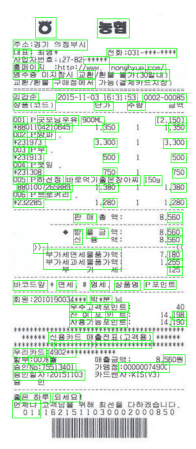

In [ ]:
read( '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt03.jpg',0.1)

[]


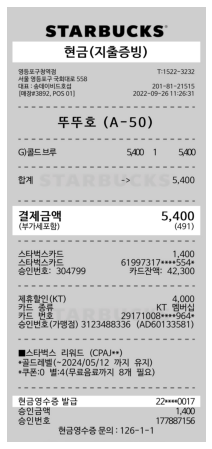

In [ ]:
read( '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt02.jpg',1)

STARBUCKS
현금(지출증방)
영등포구청역점
T:1522-3232
서울 영등포구 국회대로 558
대표
승데이비드호섭
201-81-21515
[매장#3892,POS 01]
2022-09-26 11:26:31
뚜무호
(A-50)
G)홀드브루
5400
5400
합계
 ->    5,400
결제금액
5,400
(부가세포함)
(491)
스타넉스카드
400
스타넉스카드
61997317****554*
승인번호:
304799
카드잔액: 42,300
제유할인 (KT)
4,000
카들
종류
KT
맵버십
번호
29171008****964*
승인번호 (가망점) 3123488336
(AD60133581)
다스타버스
리워드
(CPAJ**
*골드레벌(~2024/05/12
까지
유지)
*구론:0
별:4 (무료음료까지 8개 필요)
현금영수증 발급
22****0017
승인금액
4OO
승인번호
177887156
현금영수증 문의
126-1-1
[]


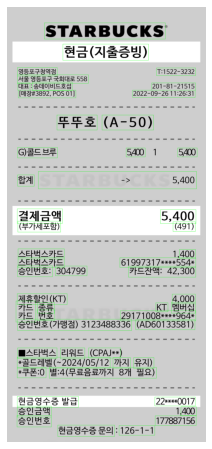

In [ ]:
read( '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt02.jpg',0.1)

STARBUCKS
현금(지출증방)
영등포구청역점
T:1522-3232
서울 영등포구 국회대로 558
대표
승데이비드호섭
201-81-21515
[매장#3892,POS 01]
2022-09-26 11:26:31
뚜무호
(A-50)
G)홀드브루
5400
5400
합계
 ->    5,400
결제금액
5,400
(부가세포함)
(491)
스타넉스카드
400
스타넉스카드
61997317****554*
승인번호:
304799
카드잔액: 42,300
제유할인 (KT)
4,000
카들
종류
KT
맵버십
번호
29171008****964*
승인번호 (가망점) 3123488336
(AD60133581)
다스타버스
리워드
(CPAJ**
*골드레벌(~2024/05/12
까지
유지)
*구론:0
별:4 (무료음료까지 8개 필요)
현금영수증 발급
22****0017
승인금액
4OO
승인번호
177887156
현금영수증 문의
126-1-1
[]


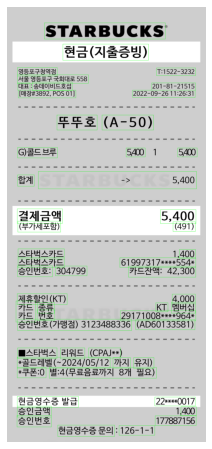

In [ ]:
read( '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt02.jpg',0.01)

STARBUCKS
현금(지출증방)
영등포구청역점
T:1522-3232
서울 영등포구 국회대로 558
대표
승데이비드호섭
201-81-21515
[매장#3892,POS 01]
2022-09-26 11:26:31
뚜무호
(A-50)
G)홀드브루
5400
5400
합계
 ->    5,400
결제금액
5,400
(부가세포함)
(491)
스타넉스카드
400
스타넉스카드
61997317****554*
승인번호:
304799
카드잔액: 42,300
제유할인 (KT)
4,000
카들
종류
KT
맵버십
번호
29171008****964*
승인번호 (가망점) 3123488336
(AD60133581)
다스타버스
리워드
(CPAJ**
*골드레벌(~2024/05/12
까지
유지)
*구론:0
별:4 (무료음료까지 8개 필요)
현금영수증 발급
22****0017
승인금액
4OO
승인번호
177887156
현금영수증 문의
126-1-1
[]


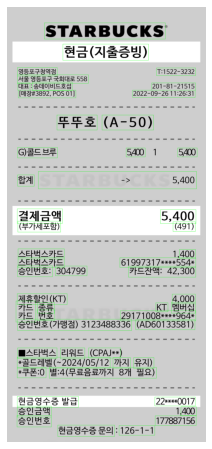

In [ ]:
read( '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt02.jpg',0.001)

STARBUCKS
현금(지출증방)
영등포구청역점
T:1522-3232
서울 영등포구 국회대로 558
대표
승데이비드호섭
201-81-21515
[매장#3892,POS 01]
2022-09-26 11:26:31
(A-50)
5400
5400
합계
결제금액
5,400
(부가세포함)
(491)
스타넉스카드
400
스타넉스카드
61997317****554*
승인번호:
304799
카드잔액: 42,300
4,000
종류
KT
번호
29171008****964*
승인번호 (가망점) 3123488336
(AD60133581)
리워드
(CPAJ**
까지
유지)
별:4 (무료음료까지 8개 필요)
현금영수증 발급
22****0017
승인금액
승인번호
177887156
현금영수증 문의
126-1-1
[]


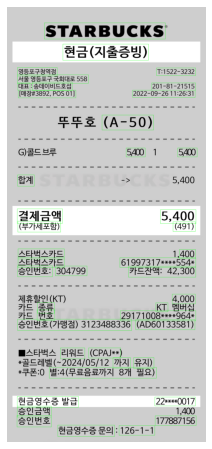

In [ ]:
read( '/content/drive/MyDrive/공모전/text-ocr/receipts/receipt02.jpg',0.5)

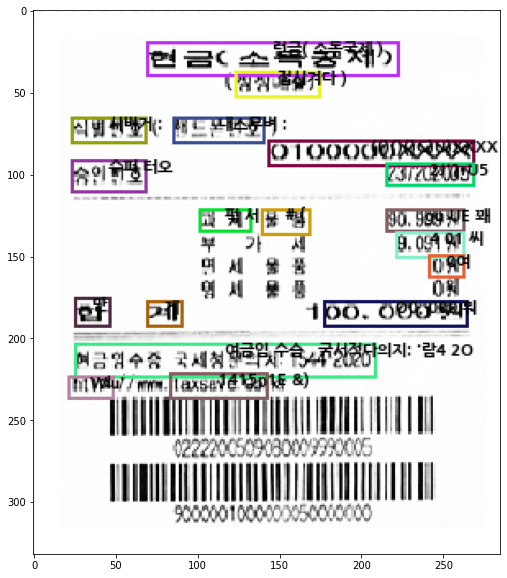

In [ ]:
import easyocr
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

reader = easyocr.Reader(['ko', 'en'], gpu = True)
result = reader.readtext(root+'receipt01.jpg')
img = cv2.imread(root+'receipt01.jpg')
img = Image.fromarray(img)
fontpath = root + 'NanumGothicExtraBold.ttf'
font = ImageFont.truetype(fontpath, 10)
draw = ImageDraw.Draw(img)
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")
for i in result :
  x = i[0][0][0] 
  y = i[0][0][1] 
  w = i[0][1][0] - i[0][0][0] 
  h = i[0][2][1] - i[0][1][1]

  color_idx = random.randint(0,255) 
  color = [int(c) for c in COLORS[color_idx]]

  draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)
  draw.text((int((x + x + w) / 2) , y-2),str(i[1]), font=font, fill=(0,0,0),)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
ls

NanumGothicBold.ttf       receipt01.jpg  receipt05.jpg  reciept04.jpg
NanumGothicExtraBold.ttf  receipt02.jpg  receipt06.jpg
NanumGothic.ttf           receipt03.jpg  receipt07.jpg


In [4]:
!pip install pyclovaocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


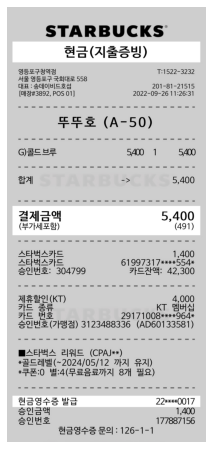

In [6]:
import matplotlib.pyplot as plt
img = plt.imread(root + 'receipt02.jpg')
plt.figure(figsize=(8, 8))
img[:, :, ::-1]
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
from pyclovaocr import ClovaOCR

ocr = ClovaOCR()

In [8]:

result = ocr.run_ocr(
    image_path= root + 'receipt02.jpg',
    language_code = 'ko',
    ocr_mode = 'receipt'

)

In [9]:
from pprint import pprint
pprint(result)

{'meta': {'imageSize': {'height': 2152, 'width': 981}},
 'result': {'paymentInfo': {'cardInfo': {'company': {'boundingBoxes': [[[50,
                                                                         1241],
                                                                        [281,
                                                                         1241],
                                                                        [281,
                                                                         1289],
                                                                        [50,
                                                                         1289]]],
                                                     'formatted': {'value': '스타벅스카드'},
                                                     'text': '스타벅스카드'},
                                         'number': {'boundingBoxes': [[[561,
                                                                        1245

In [25]:
result['result']

{'storeInfo': {'name': {'text': 'STARBUCKS', 'formatted': {'value': 'STARBUCKS'}, 'boundingBoxes': [[[181, 77], [784, 77], [784, 154], [181, 154]]]}, 'subName': {'text': '영등포구청역점', 'formatted': {'value': '영등포구청역점'}, 'boundingBoxes': [[[52, 300], [242, 300], [242, 336], [52, 336]]]}, 'bizNum': {'text': '201-81-21515', 'formatted': {'value': '201-81-21515'}, 'boundingBoxes': [[[715, 375], [930, 375], [930, 405], [715, 405]]]}, 'address': [{'text': '서울 영등포구 국회대로 558', 'formatted': {'value': '서울 영등포구 국회대로 558'}, 'boundingBoxes': [[[50, 336], [111, 336], [111, 373], [50, 373]], [[111, 336], [223, 336], [223, 371], [111, 371]], [[225, 336], [336, 336], [336, 371], [225, 371]], [[338, 338], [400, 338], [400, 371], [338, 371]]]}]}, 'paymentInfo': {'date': {'text': '2022-09-26', 'formatted': {'year': '2022', 'month': '09', 'day': '26'}, 'boundingBoxes': [[[619, 411], [849, 411], [849, 442], [619, 442]]]}, 'time': {'text': '11: 26: 31', 'formatted': {'hour': '11', 'minute': '26', 'second': '31'}

In [2]:
result = {'meta': {'imageSize': {'height': 2152, 'width': 981}},
 'result': {'paymentInfo': {'cardInfo': {'company': {'boundingBoxes': [[[50,
                                                                         1241],
                                                                        [281,
                                                                         1241],
                                                                        [281,
                                                                         1289],
                                                                        [50,
                                                                         1289]]],
                                                     'formatted': {'value': '스타벅스카드'},
                                                     'text': '스타벅스카드'},
                                         'number': {'boundingBoxes': [[[561,
                                                                        1245],
                                                                       [928,
                                                                        1245],
                                                                       [928,
                                                                        1285],
                                                                       [561,
                                                                        1285]]],
                                                    'formatted': {'value': '61997317****554*'},
                                                    'text': '61997317****554*'}},
                            'confirmNum': {'boundingBoxes': [[[236, 1284],
                                                              [392, 1284],
                                                              [392, 1330],
                                                              [236, 1330]]],
                                           'text': '304799'},
                            'date': {'boundingBoxes': [[[619, 411],
                                                        [849, 411],
                                                        [849, 442],
                                                        [619, 442]]],
                                     'formatted': {'day': '26',
                                                   'month': '09',
                                                   'year': '2022'},
                                     'text': '2022-09-26'},
                            'time': {'boundingBoxes': [[[619, 411],
                                                        [849, 411],
                                                        [849, 442],
                                                        [619, 442]],
                                                       [[847, 413],
                                                        [895, 413],
                                                        [895, 442],
                                                        [847, 442]],
                                                       [[892, 413],
                                                        [928, 413],
                                                        [928, 442],
                                                        [892, 442]]],
                                     'formatted': {'hour': '11',
                                                   'minute': '26',
                                                   'second': '31'},
                                     'text': '11: 26: 31'}},
            'storeInfo': {'address': [{'boundingBoxes': [[[50, 336],
                                                          [111, 336],
                                                          [111, 373],
                                                          [50, 373]],
                                                         [[111, 336],
                                                          [223, 336],
                                                          [223, 371],
                                                          [111, 371]],
                                                         [[225, 336],
                                                          [336, 336],
                                                          [336, 371],
                                                          [225, 371]],
                                                         [[338, 338],
                                                          [400, 338],
                                                          [400, 371],
                                                          [338, 371]]],
                                       'formatted': {'value': '서울 영등포구 국회대로 '
                                                              '558'},
                                       'text': '서울 영등포구 국회대로 558'}],
                          'bizNum': {'boundingBoxes': [[[715, 375],
                                                        [930, 375],
                                                        [930, 405],
                                                        [715, 405]]],
                                     'formatted': {'value': '201-81-21515'},
                                     'text': '201-81-21515'},
                          'name': {'boundingBoxes': [[[181, 77],
                                                      [784, 77],
                                                      [784, 154],
                                                      [181, 154]]],
                                   'formatted': {'value': 'STARBUCKS'},
                                   'text': 'STARBUCKS'},
                          'subName': {'boundingBoxes': [[[52, 300],
                                                         [242, 300],
                                                         [242, 336],
                                                         [52, 336]]],
                                      'formatted': {'value': '영등포구청역점'},
                                      'text': '영등포구청역점'}},
            'subResults': [{'items': [{'count': {'boundingBoxes': [[[719, 701],
                                                                    [742, 701],
                                                                    [742, 730],
                                                                    [719,
                                                                     730]]],
                                                 'formatted': {'value': '1'},
                                                 'text': '1'},
                                       'name': {'boundingBoxes': [[[50, 694],
                                                                   [244, 694],
                                                                   [244, 742],
                                                                   [50, 742]]],
                                                'formatted': {'value': 'G)콜드브루'},
                                                'text': 'G)콜드브루'},
                                       'priceInfo': {'price': {'boundingBoxes': [[[842,
                                                                                   696],
                                                                                  [938,
                                                                                   696],
                                                                                  [938,
                                                                                   742],
                                                                                  [842,
                                                                                   742]]],
                                                               'formatted': {'value': '5400'},
                                                               'text': '5,400'},
                                                     'unitPrice': {'boundingBoxes': [[[586,
                                                                                       694],
                                                                                      [682,
                                                                                       694],
                                                                                      [682,
                                                                                       742],
                                                                                      [586,
                                                                                       742]]],
                                                                   'formatted': {'value': '5400'},
                                                                   'text': '5,400'}}}]}],
            'totalPrice': {'price': {'boundingBoxes': [[[757, 1005],
                                                        [934, 1005],
                                                        [934, 1068],
                                                        [757, 1068]]],
                                     'formatted': {'value': '5400'},
                                     'text': '5,400'}}}}

In [7]:
result['result'].keys()

dict_keys(['paymentInfo', 'storeInfo', 'subResults', 'totalPrice'])

In [11]:
for keys in result['result'].keys():
  print(result['result'][keys])

{'cardInfo': {'company': {'boundingBoxes': [[[50, 1241], [281, 1241], [281, 1289], [50, 1289]]], 'formatted': {'value': '스타벅스카드'}, 'text': '스타벅스카드'}, 'number': {'boundingBoxes': [[[561, 1245], [928, 1245], [928, 1285], [561, 1285]]], 'formatted': {'value': '61997317****554*'}, 'text': '61997317****554*'}}, 'confirmNum': {'boundingBoxes': [[[236, 1284], [392, 1284], [392, 1330], [236, 1330]]], 'text': '304799'}, 'date': {'boundingBoxes': [[[619, 411], [849, 411], [849, 442], [619, 442]]], 'formatted': {'day': '26', 'month': '09', 'year': '2022'}, 'text': '2022-09-26'}, 'time': {'boundingBoxes': [[[619, 411], [849, 411], [849, 442], [619, 442]], [[847, 413], [895, 413], [895, 442], [847, 442]], [[892, 413], [928, 413], [928, 442], [892, 442]]], 'formatted': {'hour': '11', 'minute': '26', 'second': '31'}, 'text': '11: 26: 31'}}
{'address': [{'boundingBoxes': [[[50, 336], [111, 336], [111, 373], [50, 373]], [[111, 336], [223, 336], [223, 371], [111, 371]], [[225, 336], [336, 336], [336, 37

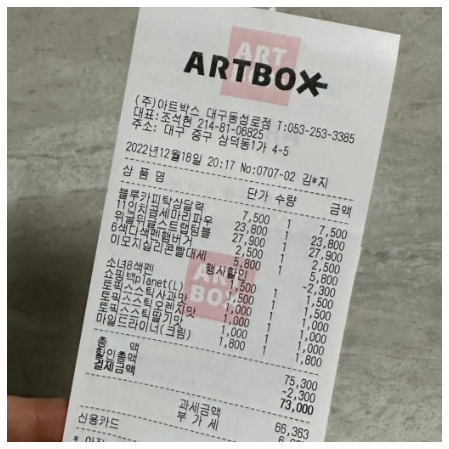

In [11]:
img = plt.imread(root + 'receipt08.jfif')
plt.figure(figsize=(8, 8))
img[:, :, ::-1]
plt.imshow(img)
plt.axis('off')
plt.show()

In [12]:
from pprint import pprint

result08 = ocr.run_ocr(
    image_path= root + 'receipt08.jfif',
    language_code = 'ko',
    ocr_mode = 'receipt'

)

pprint(result08)

{'meta': {'imageSize': {'height': 512, 'width': 512}},
 'result': {'paymentInfo': {'date': {'boundingBoxes': [[[138, 153],
                                                        [234, 171],
                                                        [230, 189],
                                                        [134, 171]]],
                                     'formatted': {'day': '18',
                                                   'month': '12',
                                                   'year': '2022'},
                                     'text': '2022년12월18일'},
                            'time': {'boundingBoxes': [[[233, 174],
                                                        [256, 174],
                                                        [256, 189],
                                                        [233, 189]],
                                                       [[254, 178],
                                                        [271, 178],
   

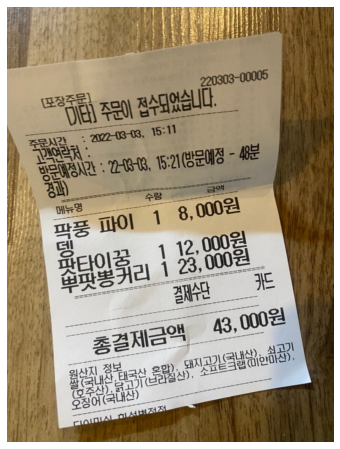

In [13]:
img = plt.imread(root + 'receipt09.jfif')
plt.figure(figsize=(8, 8))
img[:, :, ::-1]
plt.imshow(img)
plt.axis('off')
plt.show()

In [14]:
from pprint import pprint

result09 = ocr.run_ocr(
    image_path= root + 'receipt09.jfif',
    language_code = 'ko',
    ocr_mode = 'receipt'

)

pprint(result09)

{'meta': {'imageSize': {'height': 827, 'width': 620}},
 'result': {'paymentInfo': {'date': {'boundingBoxes': [[[153, 240],
                                                        [262, 230],
                                                        [263, 248],
                                                        [155, 258]],
                                                       [[185, 286],
                                                        [275, 282],
                                                        [276, 312],
                                                        [187, 316]]],
                                     'formatted': {'day': '03',
                                                   'month': '03',
                                                   'year': '2022'},
                                     'text': '2022-03-03, -13'},
                            'time': {'boundingBoxes': [[[270, 225],
                                                        [303, 225],